In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

#Del dataFrame quedar-nos amb les columnes que comencen per ND i IGT:
counts= counts.filter(regex='^(ND|T3cD)')
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,311,638,884,631,973,717,285,619,422,412
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,1,0,3,0,0,0,4,7,0,0
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,914,1365,1092,1208,882,868,1066,940,1165,1060
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,217,335,374,348,344,385,298,304,366,306
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,55,37,71,31,98,111,37,24,59,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,5,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Del DataFrame filtrar les columnes que tinguin tots els valors 0 (no expressió), i dels ensmbl treure decimals:
counts1= counts[counts.sum(axis=1) > 0]

counts1.index = [col.split('.')[0] for col in counts1.index]
counts1

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ENSG00000000003,188,198,343,214,400,528,536,246,44,34,...,311,638,884,631,973,717,285,619,422,412
ENSG00000000005,0,0,0,0,21,0,0,0,0,0,...,1,0,3,0,0,0,4,7,0,0
ENSG00000000419,697,595,503,683,552,1609,1007,461,129,165,...,914,1365,1092,1208,882,868,1066,940,1165,1060
ENSG00000000457,232,229,140,300,188,347,424,347,70,73,...,217,335,374,348,344,385,298,304,366,306
ENSG00000000460,119,85,27,101,46,35,125,105,22,34,...,55,37,71,31,98,111,37,24,59,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,6,0,0
ENSG00000285486,1,0,0,2,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285492,0,5,0,5,0,4,4,10,1,0,...,1,8,0,6,0,5,8,4,1,0
ENSG00000285498,0,0,0,0,0,0,0,0,1,0,...,0,0,0,5,0,0,0,0,0,0


In [4]:
#Transposar DataFrame:
counts=counts1.T
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285462,ENSG00000285467,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,69,0,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,30,0,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,13,0,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,64,0,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,19,0,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,44,0,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,41,0,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,1,112,0,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,8,0,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,19,0,0,0,0,0,2


# Preparar les dades per fer DEG:

In [5]:
#Definir les condicions, marcant el numero de files a les que correspon:
conditions = ['ND'] * 18 + ['T3cD'] * 35

# Crear un dataframe composat per el nom de les mostres i a quina condició patològica té:
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])

#En el dataframe metadata establir la columna sample com index:
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [6]:
from pydeseq2.dds import DeseqDataSet

# Creació de dds: objecte amb informació informació necessaria per fer DEG.
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    obsm: 'design_matrix'

In [7]:
#Calcularà els valors estadístics (resultats) com: log2FoldChange, Pvalue, Pvalue asj (equival a qvalue)...
dds.deseq2()
dds

Fitting size factors...
... done in 0.15 seconds.

Fitting dispersions...
... done in 8.57 seconds.

Fitting dispersion trend curve...
... done in 1.22 seconds.

Fitting MAP dispersions...
... done in 9.61 seconds.

Fitting LFCs...
... done in 6.36 seconds.

Replacing 1203 outlier genes.

Fitting dispersions...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.27 seconds.

Fitting LFCs...
... done in 0.24 seconds.



AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

# Veure si estan les dades normalitzades:

## 1. Boxplot abans de normalitzar:

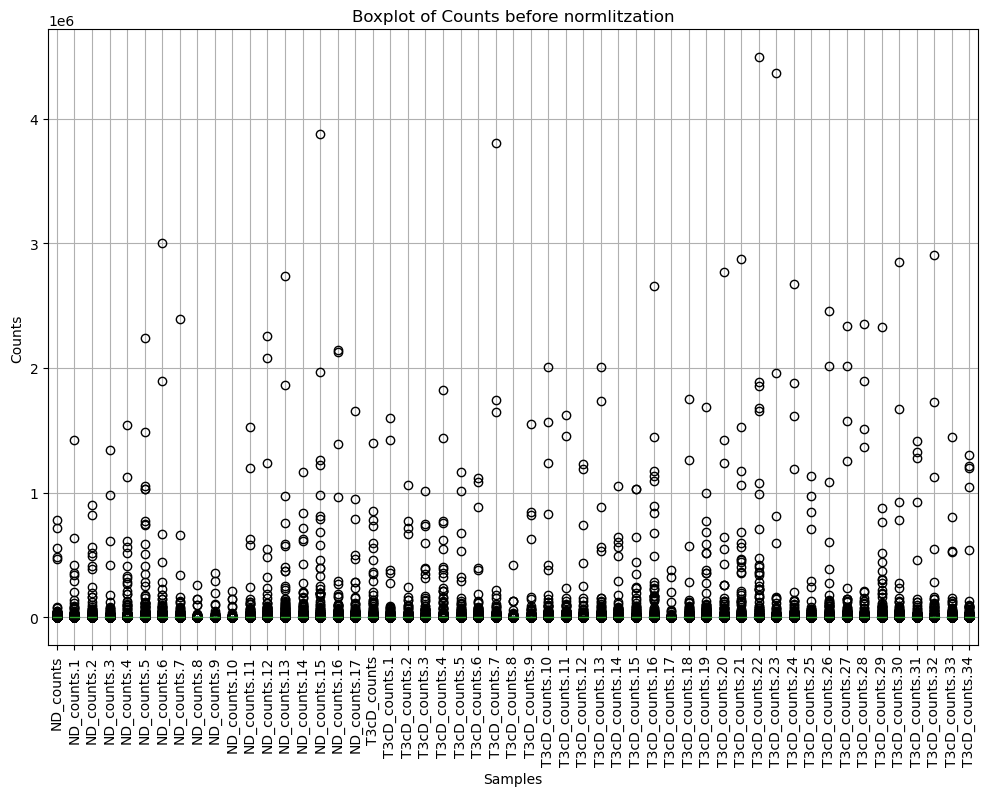

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

counts1.boxplot()
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

#### TRANSFORMAR LES DADES PER VISUALITZAR-HO MILLOR: Log1P

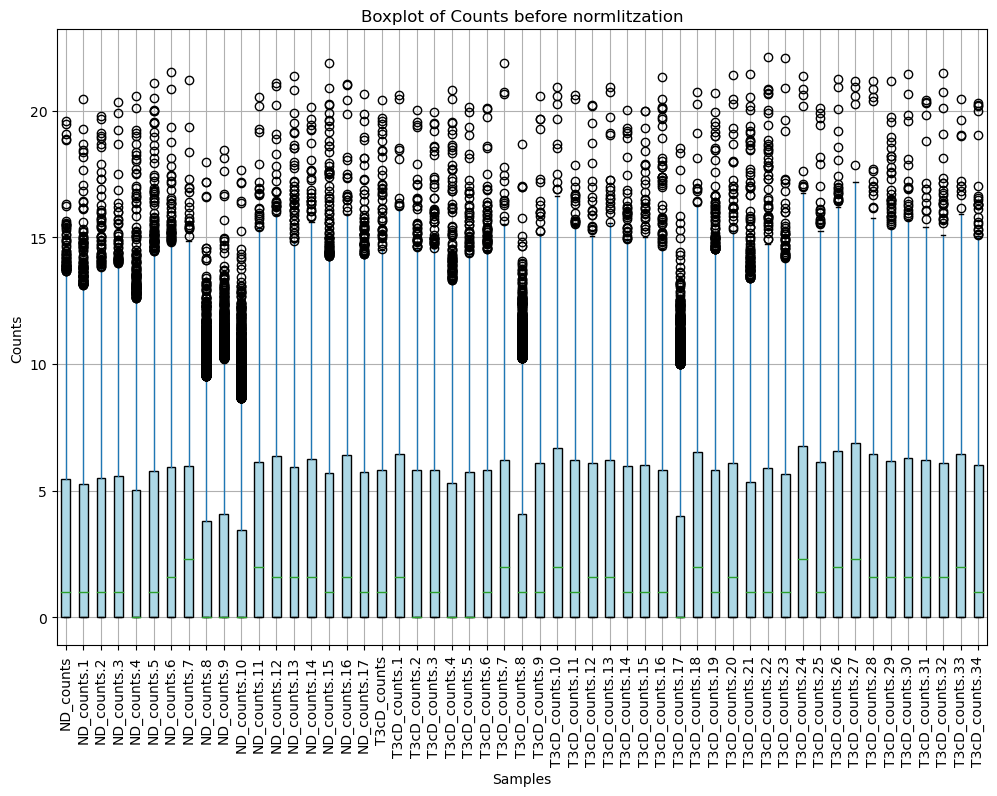

In [9]:
import numpy as np
counts1_t= np.log2(counts1 +1)
counts1_t

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

counts1_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()


#### Reduïr la densitat de mostres per veure millor: 20 mostres

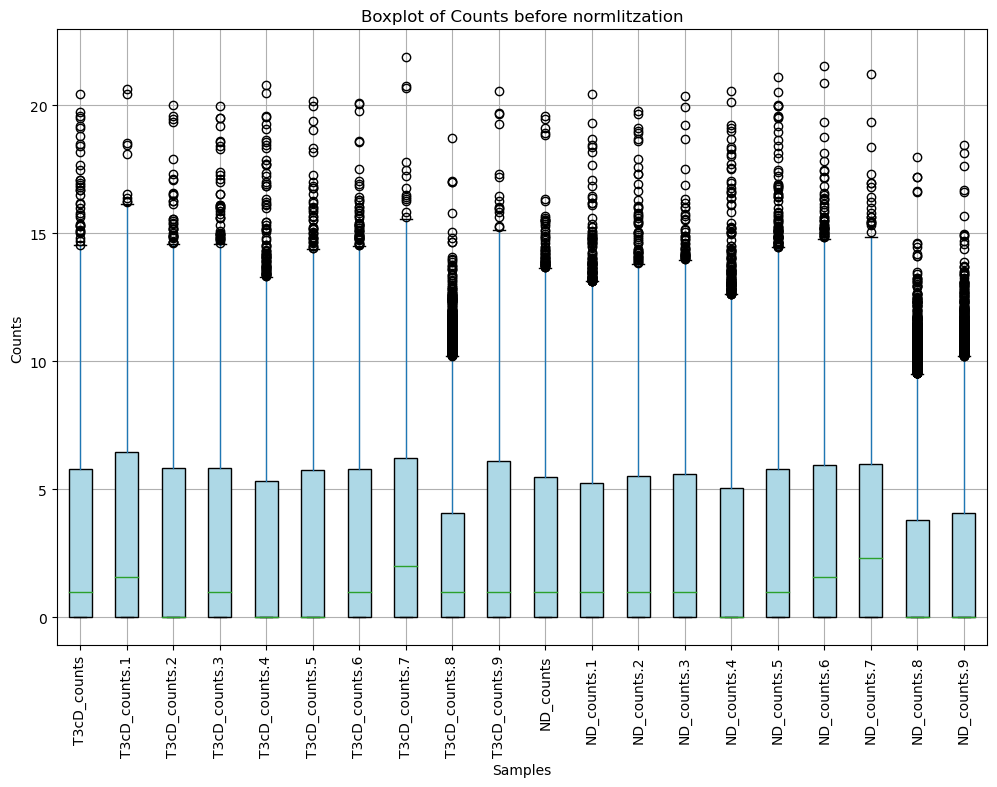

In [10]:
columns_T3cD = [col for col in counts1_t.columns if col.startswith('T3cD')]
columns_ND = [col for col in counts1_t.columns if col.startswith('ND')]

counts1_t_20 = counts1_t[columns_T3cD[:10] + columns_ND[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=counts1_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## 2. Boxplot després normalitzar:

#### 2.1 Construcció dataframe normalitzat:

In [11]:
normalized_data=dds.layers['normed_counts']
normalized_data

array([[2.04358515e+02, 0.00000000e+00, 7.57648325e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.17402676e+00],
       [2.49917706e+02, 0.00000000e+00, 7.51015329e+02, ...,
        6.31105319e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27797770e+02, 0.00000000e+00, 6.27353581e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.30186095e+02, 5.99564243e+00, 8.05129127e+02, ...,
        3.42608139e+00, 0.00000000e+00, 2.56956104e+00],
       [3.15758986e+02, 0.00000000e+00, 8.71704308e+02, ...,
        7.48244041e-01, 0.00000000e+00, 1.49648808e+00],
       [3.11756175e+02, 0.00000000e+00, 8.02091130e+02, ...,
        0.00000000e+00, 0.00000000e+00, 6.05351796e+00]])

In [12]:
normalized_df = pd.DataFrame(dds.layers['normed_counts'].T, index=dds.var_names, columns=dds.obs_names)
normalized_df

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ENSG00000000003,204.358515,249.917706,427.797770,207.140421,625.627545,449.397442,409.058291,236.383978,160.498157,101.163504,...,261.171656,393.406923,459.899625,426.138809,787.168603,505.498713,220.899233,530.186095,315.758986,311.756175
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,32.845446,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.839780,0.000000,1.560745,0.000000,0.000000,0.000000,3.100340,5.995642,0.000000,0.000000
ENSG00000000419,757.648325,751.015329,627.353581,661.107044,863.366012,1369.470613,768.510633,442.979730,470.551415,490.940532,...,767.559142,841.693495,568.111302,815.809321,713.548518,611.956601,826.240639,805.129127,871.704308,802.091130
ENSG00000000457,252.187104,289.046236,174.611335,290.383768,294.044946,295.342637,323.583424,333.435936,255.337977,217.203993,...,182.232313,206.569466,194.572918,235.017917,278.300102,271.432363,230.975338,260.382186,273.857319,231.547062
ENSG00000000460,129.354592,107.287904,33.675043,97.762535,71.947168,29.789603,95.396057,100.895600,80.249078,101.163504,...,46.187913,22.815135,36.937640,20.935504,79.283169,78.257123,28.678146,20.556488,44.146398,48.428144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.579011,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.139122,0.000000,0.000000
ENSG00000285486,1.087013,0.000000,0.000000,1.935892,0.000000,0.000000,0.000000,16.335478,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000285492,0.000000,6.311053,0.000000,4.839729,0.000000,3.404526,3.052674,9.609105,3.647685,0.000000,...,0.839780,4.933002,0.000000,4.052033,0.000000,3.525096,6.200680,3.426081,0.748244,0.000000
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.647685,0.000000,...,0.000000,0.000000,0.000000,3.376694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


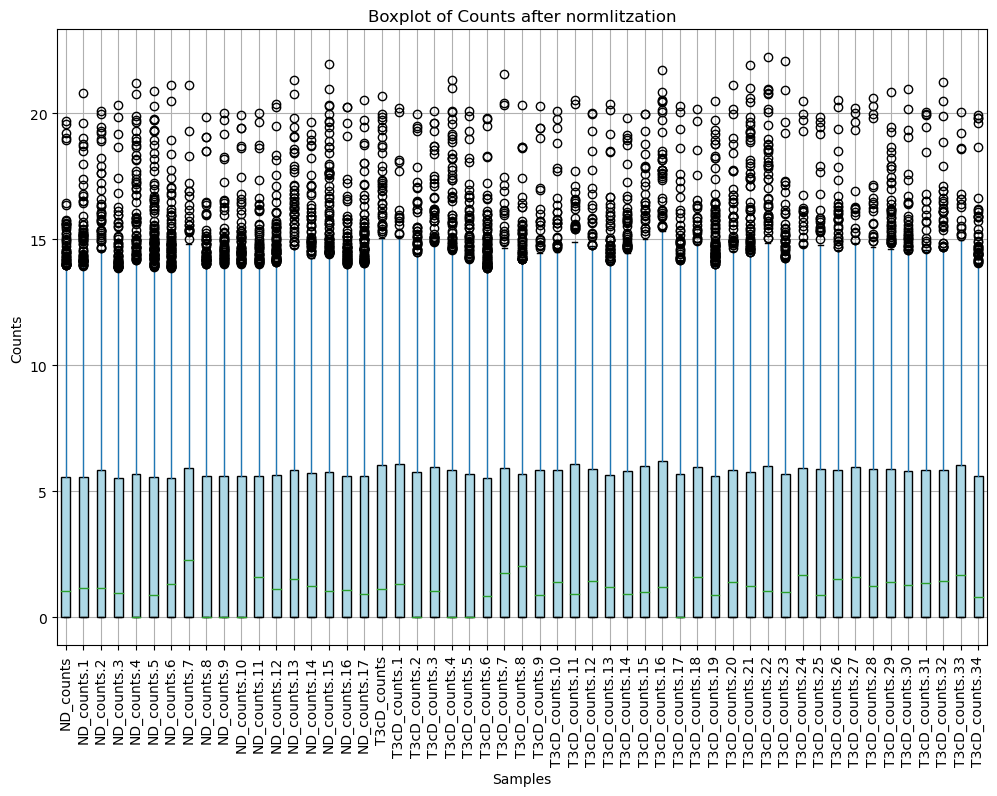

In [13]:
normalized_df_t= np.log2(normalized_df +1)
normalized_df_t

plt.figure(figsize=(12, 8)) 

normalized_df_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()

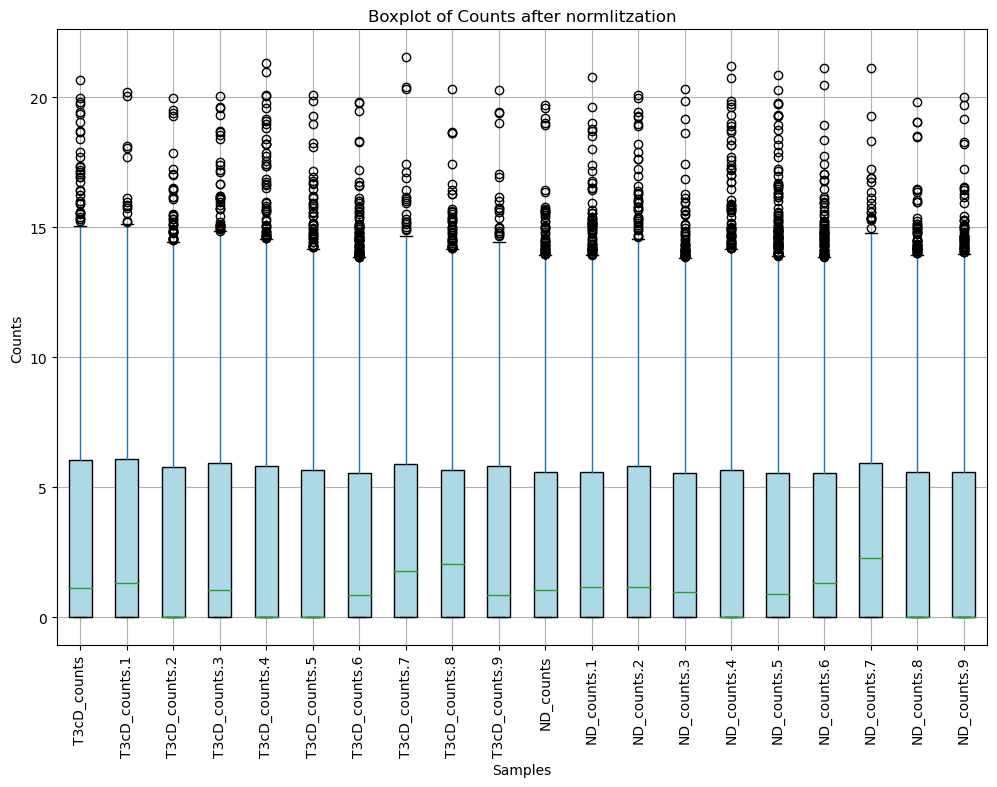

In [14]:
columns_T3cD_n = [col for col in normalized_df_t.columns if col.startswith('T3cD')]
columns_ND_n = [col for col in normalized_df_t.columns if col.startswith('ND')]

normalized_t_20 = normalized_df_t[columns_T3cD_n[:10] + columns_ND_n[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=normalized_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## DEG study:

In [15]:
from pydeseq2.default_inference import DefaultInference

#Creació de stat_res: objecte que tindrà només els resultats estadístics: log2foldchange...
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','T3cD','ND'))
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition T3cD vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  417.376683        0.499057  0.213201  2.340781  0.019243   
ENSG00000000005    0.978594        0.458627  1.342761  0.341555  0.732686   
ENSG00000000419  741.428087        0.000253  0.119866  0.002110  0.998316   
ENSG00000000457  261.221263       -0.179551  0.100580 -1.785161  0.074235   
ENSG00000000460   55.605341       -0.581161  0.192089 -3.025475  0.002482   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.294959       -1.439213  1.850973 -0.777544  0.436838   
ENSG00000285486    0.220988       -0.161045  1.752151 -0.091913  0.926767   
ENSG00000285492    2.305999        0.291646  0.777045  0.375326  0.707418   
ENSG00000285498    0.186420        0.161685  2.729928  0.059227  0.952772   
ENSG00000285509    4.612059       -0.966132  0.595715 -1.621804  0.104845   

                

... done in 3.29 seconds.



In [16]:
#Guardar els valors (resultats) de stat_res com a nom de res:
res =stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742
ENSG00000000005,0.978594,0.458627,1.342761,0.341555,0.732686,NaN
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817
...,...,...,...,...,...,...
ENSG00000285483,0.294959,-1.439213,1.850973,-0.777544,0.436838,NaN
ENSG00000285486,0.220988,-0.161045,1.752151,-0.091913,0.926767,NaN
ENSG00000285492,2.305999,0.291646,0.777045,0.375326,0.707418,0.897015
ENSG00000285498,0.186420,0.161685,2.729928,0.059227,0.952772,NaN


In [17]:
from sanbomics.tools import id_map

#Transformar els 'ensmbl' a symbol, i afegir columna a res amb el symbol:
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000005,0.978594,0.458627,1.342761,0.341555,0.732686,NaN,TNMD
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.294959,-1.439213,1.850973,-0.777544,0.436838,NaN,AL590381.1
ENSG00000285486,0.220988,-0.161045,1.752151,-0.091913,0.926767,NaN,AC003043.2
ENSG00000285492,2.305999,0.291646,0.777045,0.375326,0.707418,0.897015,AL356417.3
ENSG00000285498,0.186420,0.161685,2.729928,0.059227,0.952772,NaN,NaN


In [18]:
#Filtrar els gens amb molt poca expressió, 
#per fer-ho ens bassem en Basemean (promitg dels recomptes de lectures normalitzades d'un gen), basemean >=10:

res=res[res.baseMean>= 10]
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,18.676032,0.380185,0.355859,1.068356,0.285360,0.636390,NaN
ENSG00000285410,173.379526,0.174970,0.156829,1.115671,0.264563,0.616324,GABPB1-IT1
ENSG00000285417,10.993998,0.484542,0.371533,1.304167,0.192177,0.530044,NaN
ENSG00000285437,16.731025,0.029717,0.287128,0.103498,0.917568,0.972184,POLR2J3


In [19]:
#Dels resultats identifiquem filtrant els gens diferencialment expressats:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 1)] #dades filtrades per significancia
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
ENSG00000000971,476.409980,1.619121,0.384744,4.208306,0.000026,0.001814,CFH
ENSG00000002726,21.757189,1.623436,0.421621,3.850467,0.000118,0.005395,AOC1
ENSG00000003400,65.378373,1.161735,0.285006,4.076179,0.000046,0.002755,CASP10
ENSG00000009790,19.472053,1.265724,0.334810,3.780427,0.000157,0.006482,TRAF3IP3
...,...,...,...,...,...,...,...
ENSG00000275832,31.777076,1.384043,0.361296,3.830778,0.000128,0.005682,ARHGAP23
ENSG00000276070,43.926440,2.048935,0.572283,3.580284,0.000343,0.011231,CCL4L2
ENSG00000277734,49.983738,2.039446,0.531066,3.840291,0.000123,0.005531,TRAC
ENSG00000279355,28.902064,1.348516,0.403297,3.343729,0.000827,0.020526,NaN


### PCA:

#### PCA amb valors normalitzats:

In [20]:
normalized=normalized_df.T
normalized
import pandas as pd

# Añadir la columna "conditions" basada en el índice
normalized['conditions'] = normalized.index.map(lambda x: 'T3cD' if x.startswith('T3cD') else 'ND' if x.startswith('ND') else 'Other')
normalized.set_index('conditions', inplace=True)
normalized.index.name = None
normalized

# Añadir la columna "patologia" basada en el índice
normalized['patologia'] = normalized.index.map(lambda x: 'T3cD' if x.startswith('T3cD') else 'ND' if x.startswith('ND') else 'Other')

# Mover el índice a una nueva columna
normalized.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
normalized = normalized.rename(columns={'index': 'patologia'}).iloc[:, :-1]

normalized

,patologia,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000285462,ENSG00000285467,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
0,ND,204.358515,0.000000,757.648325,252.187104,129.354592,19.566241,31.523388,665.252187,345.670254,...,0.00000,5.435067,0.000000,75.003923,0.000000,0.000000,1.087013,0.000000,0.000000,2.174027
1,ND,249.917706,0.000000,751.015329,289.046236,107.287904,1.262211,152.727487,590.714578,285.259604,...,0.00000,3.786632,0.000000,37.866319,0.000000,0.000000,0.000000,6.311053,0.000000,0.000000
2,ND,427.797770,0.000000,627.353581,174.611335,33.675043,32.427819,588.689642,693.456443,395.369950,...,0.00000,7.483343,0.000000,16.213910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ND,207.140421,0.000000,661.107044,290.383768,97.762535,7.743567,22.262756,563.344509,389.114248,...,0.00000,9.679459,0.000000,61.948537,0.000000,0.000000,1.935892,4.839729,0.000000,7.743567
4,ND,625.627545,32.845446,863.366012,294.044946,71.947168,0.000000,65.690892,599.038374,306.557497,...,0.00000,3.128138,0.000000,29.717308,0.000000,0.000000,0.000000,0.000000,0.000000,26.589171
5,ND,449.397442,0.000000,1369.470613,295.342637,29.789603,3.404526,184.695539,652.817874,301.300557,...,0.00000,1.702263,0.000000,37.449787,0.000000,0.000000,0.000000,3.404526,0.000000,9.362447
6,ND,409.058291,0.000000,768.510633,323.583424,95.396057,7.631685,229.713705,435.006019,260.240443,...,0.00000,6.105348,0.000000,31.289907,0.000000,4.579011,0.000000,3.052674,0.000000,3.815842
7,ND,236.383978,0.000000,442.979730,333.435936,100.895600,0.960910,2.882731,414.152416,166.237513,...,0.96091,4.804552,0.960910,107.621974,0.000000,0.000000,16.335478,9.609105,0.000000,0.000000
8,ND,160.498157,0.000000,470.551415,255.337977,80.249078,3.647685,7.295371,543.505122,226.156494,...,0.00000,10.943056,0.000000,29.181483,0.000000,0.000000,0.000000,3.647685,3.647685,0.000000
9,ND,101.163504,0.000000,490.940532,217.203993,101.163504,5.950794,20.827780,449.284972,315.392099,...,0.00000,2.975397,0.000000,56.532546,0.000000,0.000000,0.000000,0.000000,0.000000,5.950794


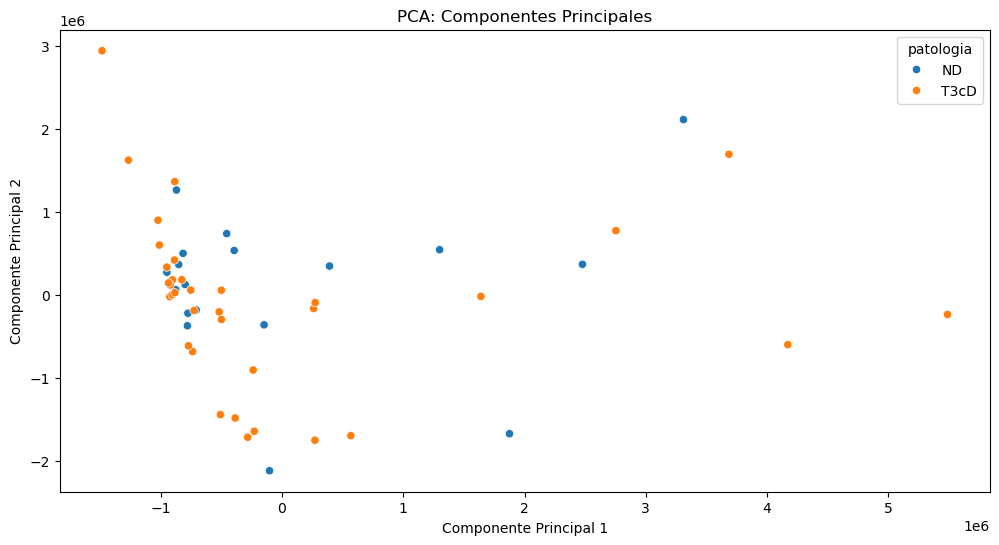

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = normalized.iloc[:, 1:48222].values  
y = normalized.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()




#### PCA sense valors normalitzat:

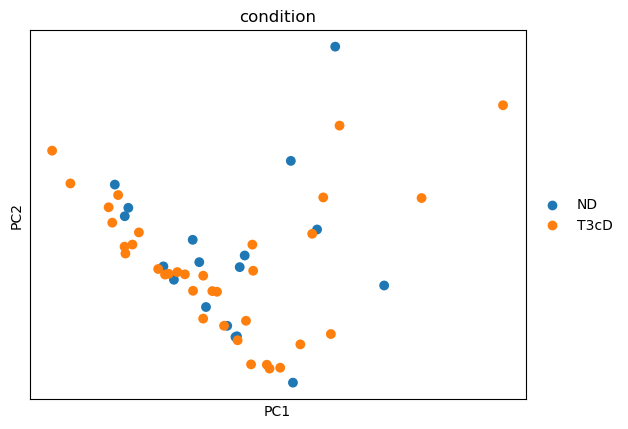

In [22]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

### ClusterMap:

In [22]:
import numpy as np
import seaborn as sns

dds.layers['normed_counts']

array([[2.04358515e+02, 0.00000000e+00, 7.57648325e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.17402676e+00],
       [2.49917706e+02, 0.00000000e+00, 7.51015329e+02, ...,
        6.31105319e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27797770e+02, 0.00000000e+00, 6.27353581e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.30186095e+02, 5.99564243e+00, 8.05129127e+02, ...,
        3.42608139e+00, 0.00000000e+00, 2.56956104e+00],
       [3.15758986e+02, 0.00000000e+00, 8.71704308e+02, ...,
        7.48244041e-01, 0.00000000e+00, 1.49648808e+00],
       [3.11756175e+02, 0.00000000e+00, 8.02091130e+02, ...,
        0.00000000e+00, 0.00000000e+00, 6.05351796e+00]])

In [23]:
dds.layers['log2']=np.log2(dds.layers['normed_counts'] +1)
dds

AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log2'

## Clustermap de Valors normalitzats transformats a log2:

In [24]:
grapher=pd.DataFrame(dds.layers['log2'].T,
                    index=dds.var_names, columns=dds.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ENSG00000000003,7.682001,7.971070,8.744154,7.701413,9.291464,8.815055,8.679685,7.891079,7.335374,6.674736,...,8.034368,8.623541,8.848309,8.738561,9.622360,8.984415,7.793761,9.053074,8.307242,8.288895
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,5.080890,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.879533,0.000000,1.356564,0.000000,0.000000,0.000000,2.035744,2.806457,0.000000,0.000000
ENSG00000000419,9.567287,9.554618,9.295433,9.370921,9.755499,10.420456,9.587797,8.794350,8.881271,8.942340,...,9.586012,9.718864,9.152567,9.673856,9.480888,9.259641,9.692163,9.654867,9.769349,9.649420
ENSG00000000457,7.984060,8.180139,7.456242,8.186777,8.204791,8.211122,8.342446,8.385586,8.001903,7.769534,...,7.517530,7.697450,7.611563,7.882753,8.125672,8.089754,7.857828,8.030017,8.102539,7.861379
ENSG00000000460,7.026298,6.758728,5.115826,6.625892,6.188780,4.944371,6.590902,6.670948,6.344280,6.674736,...,5.560345,4.573807,5.245558,4.455196,6.327026,6.308469,4.891329,4.430050,5.496539,5.627261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480009,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.618032,0.000000,0.000000
ENSG00000285486,1.061440,0.000000,0.000000,1.553799,0.000000,0.000000,0.000000,4.115656,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000285492,0.000000,2.870079,0.000000,2.545902,0.000000,2.138987,2.018874,3.407231,2.216512,0.000000,...,0.879533,2.568762,0.000000,2.336864,0.000000,2.177948,2.848133,2.146030,0.805907,0.000000
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.216512,0.000000,...,0.000000,0.000000,0.000000,2.129842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

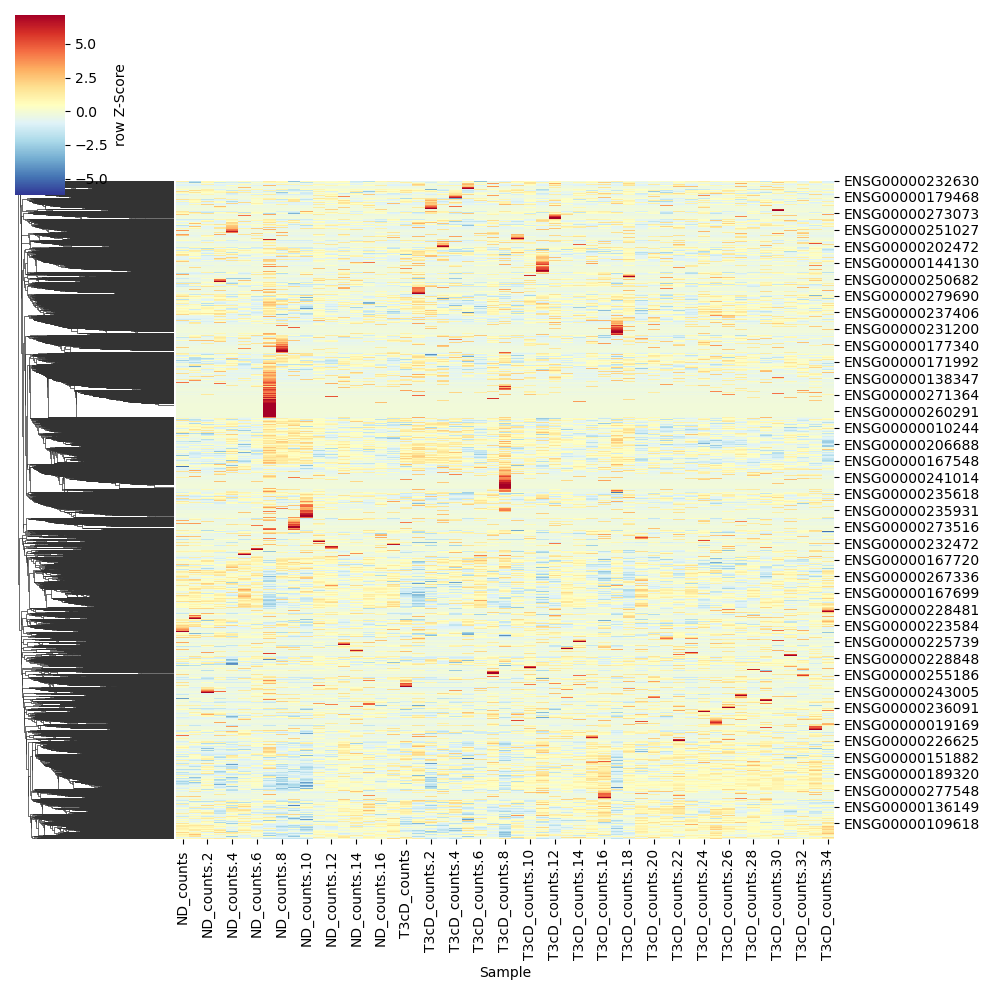

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
T3cD_samples = [col for col in grapher.columns if "T3cD" in col]

ordered_columns = nd_samples + T3cD_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':'row Z-Score'})

plt.show()

### Clustermap dels gens més significatius:

In [18]:
dds_sigs=dds[:, sigs.index]
dds_sigs.obs

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [20]:
grapher1=pd.DataFrame(dds_sigs.layers['log2'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher1

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ENSG00000000938,4.362206,1.177733,5.062977,3.128222,0.000000,2.138987,3.109642,0.971524,2.216512,2.797178,...,4.283564,2.232585,4.224075,5.593166,4.461680,4.272807,5.133553,4.486264,7.270436,3.626480
ENSG00000000971,5.023406,7.264231,9.203812,4.539950,6.059418,7.536795,7.849960,1.957072,3.052306,4.448094,...,8.637408,8.896084,10.474029,9.470517,10.182310,10.758662,8.793030,9.854934,9.565054,9.848453
ENSG00000002726,3.105861,3.472187,3.084633,0.000000,4.517084,0.000000,3.449058,4.033385,4.729759,1.991099,...,4.083709,3.070304,5.498925,4.363509,3.801592,5.807136,4.813934,6.958134,6.551243,3.220885
ENSG00000003400,1.061440,4.405677,5.704213,0.976691,4.940980,5.980313,5.143335,5.114028,4.516401,2.797178,...,6.978736,6.192690,6.246328,7.244131,7.009256,6.443148,5.847526,6.778446,6.906540,5.387543
ENSG00000009790,0.000000,0.000000,3.751918,1.964893,1.358435,3.691070,4.943151,1.957072,3.578100,0.000000,...,2.594234,3.267948,4.007842,4.498943,4.659374,5.000939,3.975136,3.601074,5.891493,2.469922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000275832,0.000000,1.177733,4.105503,4.043269,0.000000,4.682731,4.271728,2.276092,3.578100,0.000000,...,6.194188,5.670915,5.926677,5.444480,5.256050,4.968820,5.747006,5.562307,5.854658,5.995603
ENSG00000276070,2.419014,3.099845,2.582290,0.000000,0.000000,3.487175,4.089713,3.853272,3.052306,3.311240,...,2.378207,4.814115,6.798215,5.834234,5.024651,4.514475,2.848133,7.986829,5.778040,2.469922
ENSG00000277734,5.577174,0.000000,6.120960,0.000000,0.000000,0.888407,4.483411,0.000000,0.000000,1.991099,...,4.010426,4.285310,5.837611,5.593166,7.171878,6.256200,6.128924,3.495471,9.004353,2.965361
ENSG00000279355,2.091206,2.596659,3.282524,3.541937,0.000000,1.434168,3.546507,5.750876,5.977524,3.988865,...,5.180735,5.316413,5.547877,2.823352,4.169063,4.600842,5.000153,4.540370,4.764927,4.315946


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

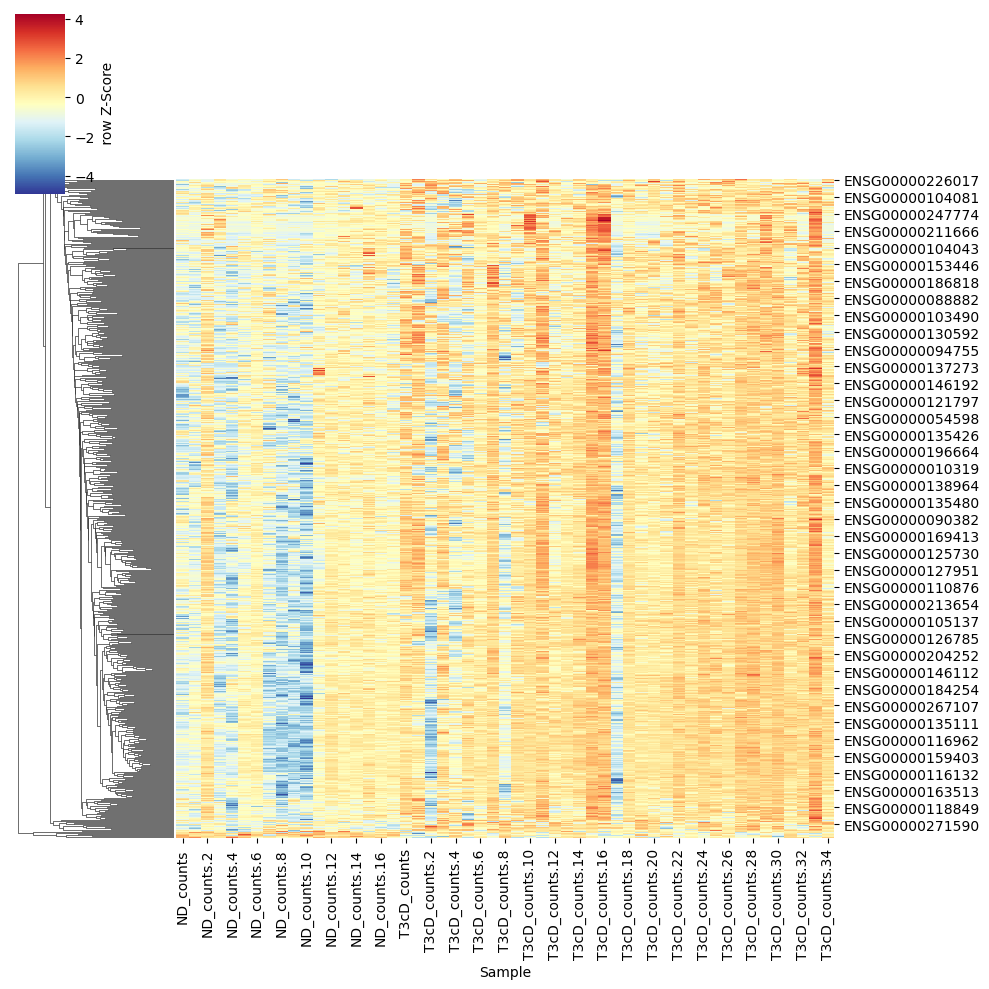

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples1 = [col for col in grapher1.columns if "ND" in col]
T3cD_samples1 = [col for col in grapher1.columns if "T3cD" in col]

ordered_columns1 = nd_samples1 + T3cD_samples1

grapher_ordered1 = grapher1[ordered_columns1]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered1, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':' row Z-Score'})

plt.show()


### VolcanoPlot:

In [23]:
from sanbomics.plots import volcano

res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,18.676032,0.380185,0.355859,1.068356,0.285360,0.636390,NaN
ENSG00000285410,173.379526,0.174970,0.156829,1.115671,0.264563,0.616324,GABPB1-IT1
ENSG00000285417,10.993998,0.484542,0.371533,1.304167,0.192177,0.530044,NaN
ENSG00000285437,16.731025,0.029717,0.287128,0.103498,0.917568,0.972184,POLR2J3


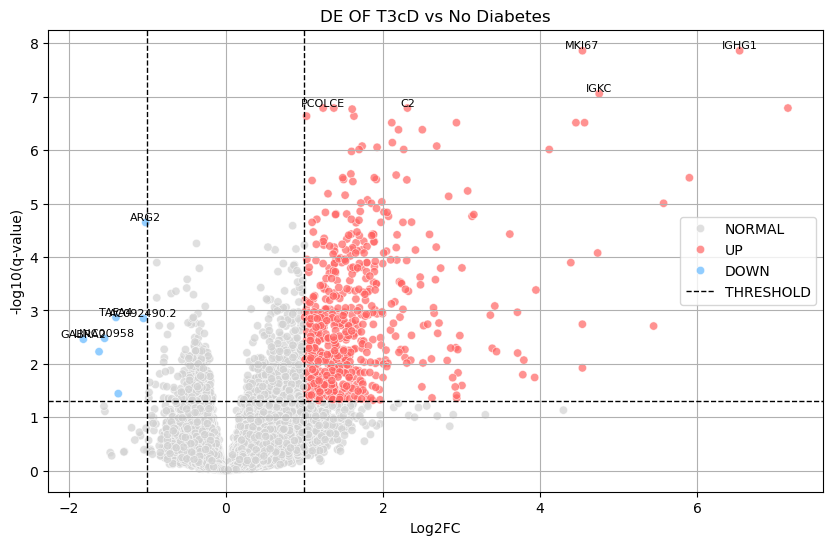

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'LogFC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['LogFC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['LogFC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['LogFC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Log2FC')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T3cD vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()


In [26]:
print("Genes diferencialmente expresados con su q-value y dirección:")
de=t_sign[['gen', 'q_value', 'sign']]
de=de.sort_values(by='q_value', ascending=False)
de

Genes diferencialmente expresados con su q-value y dirección:


,gen,q_value,sign
ENSG00000104267,CA2,4.960574e-02,UP
ENSG00000114251,WNT5A,4.912885e-02,UP
ENSG00000229989,MIR181A1HG,4.847124e-02,UP
ENSG00000127533,F2RL3,4.846448e-02,UP
ENSG00000136689,IL1RN,4.803738e-02,UP
...,...,...,...
ENSG00000106333,PCOLCE,1.625936e-07,UP
ENSG00000204262,COL5A2,1.625936e-07,UP
ENSG00000211592,IGKC,8.769822e-08,UP
ENSG00000148773,MKI67,1.374346e-08,UP


In [27]:
downregulated_genes = t_results[t_results['sign'] == 'DOWN']
downregulated_genes_df = pd.DataFrame(downregulated_genes)


print(downregulated_genes)

                        gen       p_value   q_value     LogFC  sign
ENSG00000081181        ARG2  5.861650e-08  0.000023 -1.020586  DOWN
ENSG00000143552     NUP210L  1.936445e-03  0.036062 -1.369696  DOWN
ENSG00000151834      GABRA2  6.302940e-05  0.003453 -1.814129  DOWN
ENSG00000163377       TAFA4  1.675458e-05  0.001352 -1.398975  DOWN
ENSG00000225833  AC097625.1  1.362939e-04  0.005909 -1.614458  DOWN
ENSG00000251381   LINC00958  5.995202e-05  0.003323 -1.543863  DOWN
ENSG00000255829  AC092490.2  1.771166e-05  0.001406 -1.049172  DOWN


In [28]:
genes_downregulated = downregulated_genes_df['gen']
genes_downregulated

ENSG00000081181          ARG2
ENSG00000143552       NUP210L
ENSG00000151834        GABRA2
ENSG00000163377         TAFA4
ENSG00000225833    AC097625.1
ENSG00000251381     LINC00958
ENSG00000255829    AC092490.2
Name: gen, dtype: object

In [29]:
genes_downregulated.to_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/Genes downregulated/T3cD_down.txt', index=False, header=False)